In [90]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import datasets

#### Get Digits Data

In [4]:
data = datasets.load_digits()

In [111]:
X = data.data
y = data.target

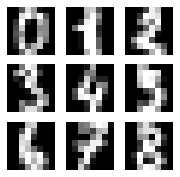

In [84]:
n = 3
_, axarr = plt.subplots(n,n,figsize=(n,n))
for i in range(n):
    for j in range(n):
        k = i*n + j
        axarr[i,j].imshow(data.images[k], cmap='gray')
        axarr[i,j].axis('off')

#### Transform

In [157]:
def one_hot(target, n_classes):
    n_samples = target.shape[0]
    one_hot = np.zeros((n_samples, n_classes))
    one_hot[np.arange(n_samples), target] = 1
    return one_hot

In [112]:
X.shape

(1797, 64)

In [113]:
y.shape

(1797,)

In [158]:
def transform_data(X,y):
    #assumes X is an ndarray of shape (num_samples, num_features)
    #assumes y is a vector of shape (num_samples,)
    #one-hot encoding of y
    Y = one_hot(y,10)
    #normalizing X
    X = X / X.max()
    #training/test split
    n = math.floor(0.8 * X.shape[0])
    indices = np.random.permutation(X.shape[0])
    train_idx, test_idx = indices[:n], indices[n:]
    X_train, X_test = X[train_idx,:], X[test_idx,:]
    Y_train, Y_test = Y[train_idx,:], Y[test_idx,:]
    #zip
    training_data = list(zip(X_train, Y_train))
    test_data = list(zip(X_test, Y_test))
    return training_data, test_data

In [159]:
train, test = transform_data(X,y)

In [160]:
train[0][0].shape, train[0][1].shape

((64,), (10,))

In [161]:
test[0][0].shape, test[0][1].shape

((64,), (10,))

#### Apply the Classifier

In [39]:
import neural_net
from importlib import reload

In [58]:
reload(neural_net)

<module 'neural_net' from '/Users/nikku/projects/neural_net_classifier/neural_net.py'>

In [59]:
nn = neural_net.NeuralNetwork([64,15,10])